# Unveiling the Driving Factors: Exploring the Influences on Car Prices

As an analyst at Crankshaft List, delving into the world of car sales is an exhilarating experience. Each day, our platform witnesses a surge of free vehicle advertisements, painting a vivid picture of the market's dynamics.Through a comprehensive analysis of our vast vehicles ads database, we aim to shed light on the pivotal factors that wield the greatest influence when it comes to selling a car.

### Table of content

<span style='color:blue'>

1.Introduction
  

2.General Information


3.First Impressions
 
4.Data Preprocessing
  
5.Exploratory Data Analysis

6.Unveiling Top Car Types
  
 7.Unraveling Price Factors
  
8.General Conclusions: Insights and Takeaways

9.Conclusion and Project Completion Checklist

### Introduction

Welcome to the fascinating world of car sales analysis! In this analysis, we will delve into car sales data and embark on a journey to uncover the factors that play a pivotal role in influencing car prices.

Car sales are a dynamic and ever-evolving market, with hundreds of transactions taking place every day. Understanding the intricate web of variables that contribute to price fluctuations is crucial for both buyers and sellers in making informed decisions.

### General information

In [46]:
# Loading all the libraries
import pandas as pd
import plotly.express as px
from pandas.plotting import scatter_matrix
import datetime
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


Load the dataset.

In [2]:
try:
    vehicle_ad_data=pd.read_csv('/Users/lelou/Car-Advertisement/vehicles_us.csv')
except:
    vehicle_ad_data=pd.read_csv('https://code.s3.yandex.net/datasets/vehicles_us.csv')

In [3]:
vehicle_ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB



The "vehicle_us" dataset consists of 51,525 entries with 13 columns, providing information about vehicles available for sale. It includes details like price, model year, model, condition, cylinders, fuel, odometer, transmission, type, paint color, is_4wd, date posted, and days listed. The dataset contains a mix of numeric and categorical data, with some columns having missing values. Overall, analyzing this dataset can offer insights into the used vehicle market and factors affecting pricing and desirability.

### First Impressions

In [4]:
#look at a sample of data for first 20 rows
vehicle_ad_data.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [5]:
# A summary statistics table for categorical columns in a DataFrame
vehicle_ad_data.describe(include='object').T

,count,unique,top,freq
model,51525,100,ford f-150,2796
condition,51525,6,excellent,24773
fuel,51525,5,gas,47288
transmission,51525,3,automatic,46902
type,51525,13,SUV,12405
paint_color,42258,12,white,10029
date_posted,51525,354,2019-03-17,186


The dataset contains information on 51,525 vehicles. The most popular vehicle model is the "Ford F-150" with 2,796 occurrences. A significant number of vehicles are listed as being in "excellent" condition (24,773 entries). The majority of vehicles run on "gas" fuel (47,288 entries) and have "automatic" transmission (46,902 entries). The most frequently listed vehicle type is "SUV" (12,405 entries). The most common paint color is "white" (10,029 entries), and the vehicles were posted on 354 different dates, with the most frequent date being "2019-03-17" (186 occurrences).

## Data Preprocessing

### Processing missing value

In [6]:
#count number of null in the dataset
print('total number of row :',len(vehicle_ad_data))
vehicle_ad_data.isna().sum()


total number of row : 51525


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:
#Propotion of missing value compare to the whole percentage in percent
propor_miss_percent = (vehicle_ad_data.isnull().sum() / len(vehicle_ad_data)) * 100
propor_miss_percent

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

<span style='color:blue'>
The dataset analysis reveals intriguing insights:

-Missing values are present across multiple columns, except for the "price" column which is complete.

-The "model_year" column has 3,619 missing values, creating uncertainty about the manufacturing year of certain vehicles.

-The "cylinders" column shows 5,260 missing values, suggesting a lack of cylinder information.

-The "odometer" column has 7,892 missing values, indicating a lack of distance traveled data.

-The "paint_color" column has 9,267 missing values, leaving color information unknown.

-Surprisingly, the "is_4wd" column has 25,953 missing values, with almost half of the available values being 1. These missing values could potentially be interpreted as 0.

-Possible reasons for missing values include intentional omission, data entry errors, incomplete information from sellers, and even incorrect measurements or equipment errors.

-Anomalies like unusually low prices raise concerns about data quality.
Effective data cleaning and imputation techniques are crucial to ensure accurate and comprehensive analysis.

### Step to fill in missing data

In [8]:
# Fill the NaNs in is_4wd column with zeros since the column contains either 1 or 0
vehicle_ad_data['is_4wd'].fillna(value= 0.0, inplace=True)
vehicle_ad_data['is_4wd'] = vehicle_ad_data['is_4wd'].astype(int)
vehicle_ad_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28


In [9]:
#Fill missing value in model_year column with the median of cars of the same model
vehicle_ad_data['model_year'].fillna(
    vehicle_ad_data.groupby(['model'])['model_year'].transform(np.median), inplace=True
)
unique_cylinders = vehicle_ad_data['cylinders'].unique()
print(unique_cylinders)

[ 6.  4.  8. nan  5. 10.  3. 12.]


By using the median to fill in missing 'model_year' values, we are choosing a value that is representative of the central tendency of the data. It provides a reasonable estimate for the missing values without being skewed by extreme values which is 'model_year' min value is 1908 and max value 2019 

In [10]:
# Fill missing values in 'cylinders' based on car model
vehicle_ad_data['cylinders'].fillna(
    vehicle_ad_data.groupby(['model'])['cylinders'].transform('median'), inplace=True
)

# Filter out incorrect values with 4 characters
vehicle_ad_data = vehicle_ad_data[vehicle_ad_data['cylinders'].astype(str).str.len() < 4]



The cylinders column represents discrete values, and using the meadian could be appropriate as there no outliers or extreme values that might heavily influence the mean as both mean value of 'cylinders' is 6 which is in reasonable range compare to the min value 3 and max value 12

In [11]:
#Filled last missing odometer values of same listing with the mean value 
vehicle_ad_data['odometer'].fillna((vehicle_ad_data['odometer'].mean()), inplace=True)

In [12]:
# change the missing values from 'paint_color' with the most occuring color from mode
vehicle_ad_data['paint_color'] = vehicle_ad_data.groupby('model')['paint_color'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [13]:
vehicle_ad_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,50974.000000,50974.000000,50974.000000,50974.000000,50974.000000,50974.000000
mean,12184.917958,2009.763007,6.079060,115980.344653,0.493075,39.549869
std,10029.128146,6.094470,1.616071,59735.258143,0.499957,28.197912
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,80000.000000,0.000000,19.000000
50%,9000.000000,2011.000000,6.000000,115980.344653,0.000000,33.000000
75%,16838.000000,2014.000000,8.000000,147000.000000,1.000000,53.000000
max,375000.000000,2019.000000,8.000000,990000.000000,1.000000,271.000000


In [14]:
# Make sure the table contains no more missing columns
missing_counts = vehicle_ad_data.isna().sum()
# Display the count of missing values in each column
print( missing_counts)

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


### Process Duplicates

In [15]:
# counting clear dublicates
print(vehicle_ad_data.duplicated().sum()) 

0


The result indicates that there are no obvious duplicates present in the dataset. However, it is possible that there are implicit duplicates where the model names are written differently. Such errors can impact the accuracy of the results obtained from the analysis.

In [16]:
#viewing unique model name
vehicle_ad_data['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

Based on the 'model' column, we found duplicates for the Ford F-150, Ford F-250 SD, and Ford F-350 SD. The model names ['ford f-150', 'ford f-250 sd', 'ford f-350 sd'] correspond to ['ford f150', 'ford f-250 super duty', 'ford f350 super duty'].
To get rid of them, declare the function `replace_wrong_models()` with two parameters: 
* `wrong_models=` — the list of duplicates
* `correct_models=` — the string with the correct value

The function should correct the names in the `'model'` column from the `vehicle_ad_data` table.


In [17]:
# function replace implicit duplicates
def replace_wrong_models(wrong_models, correct_models):
    # Replace the wrong model names with the correct model names
    vehicle_ad_data['model'] = vehicle_ad_data['model'].replace(wrong_models, correct_models)
    # Print the updated 'model' column
    print(vehicle_ad_data['model'])


In [18]:
#list of wrong model
wrong_models=['ford f150', 'ford f-250 super duty', 'ford f350 super duty']
#list of correct model
correct_models=['ford f-150', 'ford f-250 sd', 'ford f-350 sd']
#call of the function to replace wrong models
replace_wrong_models(wrong_models, correct_models)

0                bmw x5
1            ford f-150
2        hyundai sonata
3            ford f-150
4          chrysler 200
              ...      
51520     nissan maxima
51521       honda civic
51522    hyundai sonata
51523    toyota corolla
51524     nissan altima
Name: model, Length: 50974, dtype: object


Last but not least, we prefer to have a unique combinations of 'price', 'model_year', 'model', and 'odometer' values which will eliminate  duplicate data. As duplicate data can be a sign of data quality issues, such as data entry errors or data duplication during merging or importing processes. Identifying and removing duplicates improves the overall quality of the dataset.

In [19]:
#Drop duplicates
vehicle_ad_data = vehicle_ad_data.drop_duplicates(subset=['model','price', 'model_year', 'model', 'odometer'])
vehicle_ad_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40499 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         40499 non-null  int64  
 1   model_year    40499 non-null  float64
 2   model         40499 non-null  object 
 3   condition     40499 non-null  object 
 4   cylinders     40499 non-null  float64
 5   fuel          40499 non-null  object 
 6   odometer      40499 non-null  float64
 7   transmission  40499 non-null  object 
 8   type          40499 non-null  object 
 9   paint_color   40499 non-null  object 
 10  is_4wd        40499 non-null  int32  
 11  date_posted   40499 non-null  object 
 12  days_listed   40499 non-null  int64  
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 4.2+ MB


### Data replacement

In [20]:
#check data type
vehicle_ad_data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd            int32
date_posted      object
days_listed       int64
dtype: object

model_year: The model_year column is currently represented as a float64 data type. To plot a histogram or scatterplot based on the model year, it is generally more appropriate to convert it to an integer data type. This allows for better visualization and interpretation of the data, as model years are typically represented as whole numbers.

cylinders: The cylinders column is currently represented as a float64 data type. However, since the number of cylinders in a vehicle is typically a discrete value, it is often more appropriate to convert it to an integer data type for plotting purposes. This ensures that the data is displayed accurately without decimal places.

odometer: The odometer column is currently represented as a float64 data type, which indicates a continuous numerical value. To plot a histogram or scatterplot based on the odometer reading, it is common to keep it as a numerical value rather than converting it to a different data type.

date_posted: The date_posted column is currently represented as an object data type, which typically indicates a string or generic object. To plot data over time or analyze temporal patterns, it is advisable to convert this column to a datetime data type. This allows for easier manipulation, sorting, and visualization of the dates.

In [21]:
#Replaceing data type for model_year category to int
vehicle_ad_data['model_year'] = vehicle_ad_data['model_year'].astype(int)
#Replaceing data type for cylinders category to int
vehicle_ad_data['cylinders'] = vehicle_ad_data['cylinders'].astype(int)
#Replaceing data type for odometer category to int
vehicle_ad_data['odometer'] = vehicle_ad_data['odometer'].astype(int)
#Replacing data type for date_posted into datetime type
vehicle_ad_data['date_posted']=pd.to_datetime(vehicle_ad_data['date_posted'])

In [22]:
# Check for data type again
#Checking data types
vehicle_ad_data.dtypes

price                    int64
model_year               int32
model                   object
condition               object
cylinders                int32
fuel                    object
odometer                 int32
transmission            object
type                    object
paint_color             object
is_4wd                   int32
date_posted     datetime64[ns]
days_listed              int64
dtype: object

### Make Calculation and Enrich the data

In [23]:
#  Change the condition values with something that can be manipulated more easily
vehicle_ad_data.loc[:, 'condition'] = vehicle_ad_data['condition'].replace(
    to_replace=['new', 'like new', 'excellent', 'good', 'fair', 'salvage'],
    value=[5, 4, 3, 2, 1, 0]
)

# Check unique values in the 'condition' column
unique_conditions = vehicle_ad_data['condition'].unique()
print(unique_conditions)


[2 4 1 3 0 5]


In [24]:
#add the age of the car
# first isolate 'year' from 'date_posted' column
vehicle_ad_data['year_posted'] = vehicle_ad_data['date_posted'].dt.year
# create a function that calculate car age
def calculate_car_age(row):
    return (row['year_posted'] - row['model_year'])+1

vehicle_ad_data['Car_Age'] = vehicle_ad_data.apply(calculate_car_age, axis=1)

vehicle_ad_data['Car_Age'].unique()


array([  8,   7,  17,   3,   5,   4,  12,   2,  11,   6,   9,   1,  10,
        16,  15,  14,  18,  13,  54,  25,  19,  20,  27,  23,  39,  21,
        24,  45,  22,  26,  34,  43,  32,  44,  30,  29,  47,  53,  50,
        31,  41,  55,  40,  51,  28,  33,  56,  38,  57,  35,  46,  42,
        52,  64,  48,  49,  37,  36,  66,  58,  72,  59,  60, 111,  83,
        70,  61,  90], dtype=int64)

Mileage is a crucial factor that can significantly impact the price of a car. Generally, higher mileage tends to lower the price. To calculate the car's mileage, we utilize the following function:

vehicle_data['Car_mileage'] = vehicle_data['odometer'] / (vehicle_data['year_posted'] - vehicle_data['model_year'])

In this function, we include a "+1" to the equation row['year_posted'] - row['model_year']. This addition ensures that we avoid infinite values for 'Car_mileage'. Without this adjustment, if there are 'Car_age' values of 0, the equation would result in division by zero, which is undefined.

In [25]:
# Add 'Car_mileage' and handle non-finite values
vehicle_ad_data['Car_mileage'] = vehicle_ad_data['odometer'] / (vehicle_ad_data['year_posted'] - vehicle_ad_data['model_year'])
vehicle_ad_data['Car_mileage'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Round 'Car_mileage' to remove decimal places
vehicle_ad_data['Car_mileage'] = vehicle_ad_data['Car_mileage'].round()

# Check the data type of 'Car_mileage'
vehicle_ad_data['Car_mileage'].dtypes
#Verify new columns
vehicle_ad_data.head()
vehicle_ad_data.info()
vehicle_ad_data['cylinders'].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 40499 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         40499 non-null  int64         
 1   model_year    40499 non-null  int32         
 2   model         40499 non-null  object        
 3   condition     40499 non-null  object        
 4   cylinders     40499 non-null  int32         
 5   fuel          40499 non-null  object        
 6   odometer      40499 non-null  int32         
 7   transmission  40499 non-null  object        
 8   type          40499 non-null  object        
 9   paint_color   40499 non-null  object        
 10  is_4wd        40499 non-null  int32         
 11  date_posted   40499 non-null  datetime64[ns]
 12  days_listed   40499 non-null  int64         
 13  year_posted   40499 non-null  int32         
 14  Car_Age       40499 non-null  int64         
 15  Car_mileage   39055 non-null  float64    

array([6, 4, 8, 5, 3])

### Exploratory data analysis

After informing your boss about completing the data cleaning process, your manager promptly provides you with specific parameters to prioritize. These parameters include: 

-price 

-Car_Age 

-Car_mileage 

-cylinders

-Conditions
 
To ensure a focused analysis, your manager suggests eliminating any outliers from the dataset. Additionally, your manager advises narrowing the analysis to only the two or three most frequently advertised types of vehicles on the website. By narrowing the focus to these specific types, you can obtain valuable insights and make informed decisions based on the most prevalent and relevant vehicles in your dataset. This targeted approach will enable you to extract meaningful patterns and trends from the data, leading to more accurate and actionable conclusions.

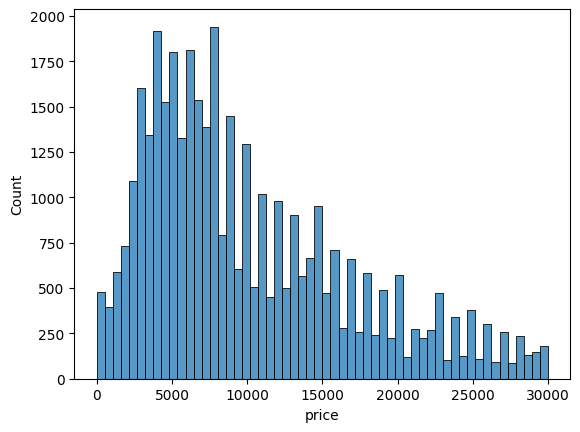

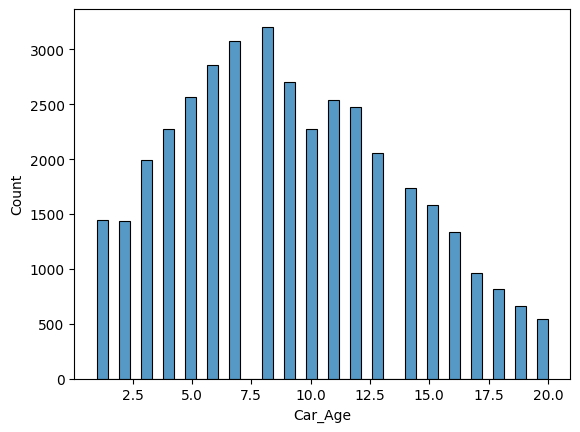

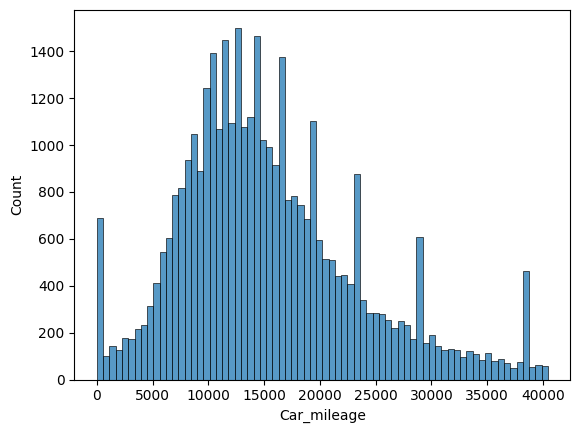

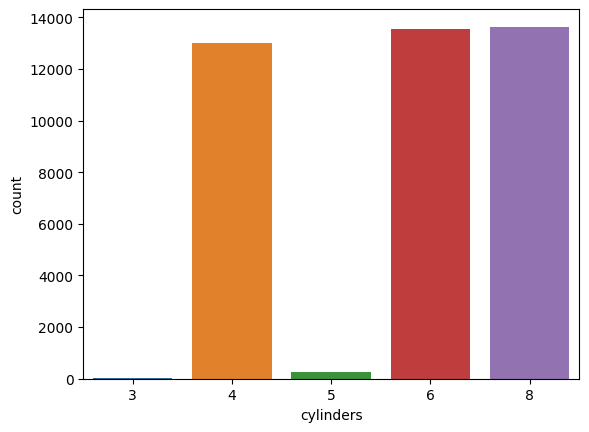

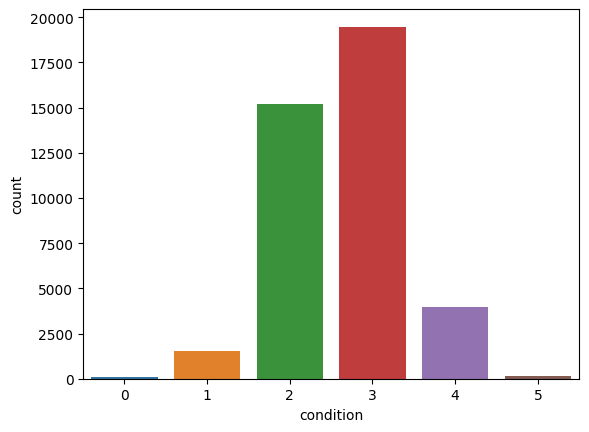

In [36]:
#data distribution for price
sns.histplot(vehicle_ad_data, x='price')
plt.show()
#data distribution for Car_Age
sns.histplot(vehicle_ad_data, x='Car_Age')
plt.show()
#data distribution for Car_mileage
sns.histplot(vehicle_ad_data, x='Car_mileage')
plt.show()
#data distribution for cylinders
sns.countplot(x=vehicle_ad_data['cylinders'])
plt.show()
#data distribution for condition
sns.countplot(data=vehicle_ad_data, x='condition')
plt.show()


The last two variables:condition,cylinders are categorical, meaning they have a limited number of distinct values. Therefore, there is no need to make any changes to their data range. However, the first three variables, price, Car_Age, and Car_mileage, follow a Poisson distribution. This distribution reveals an interesting pattern in the data. Initially, the counts are relatively small, but they rapidly increase until reaching a peak in the first tenth area. Afterward, the counts gradually diminish.

To further analyze these variables, we can create boxplot distributions for price, Car_Age, and Car_mileage. The boxplot provides visual insights into the distribution of these variables, including measures of central tendency, dispersion, and potential outliers. By examining the boxplots, we can gain a better understanding of the overall range and distribution of these variables in our dataset.


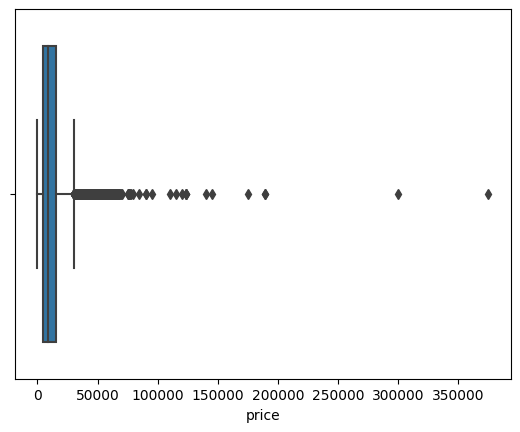

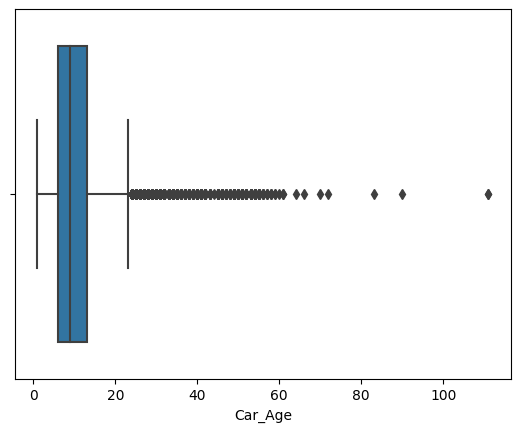

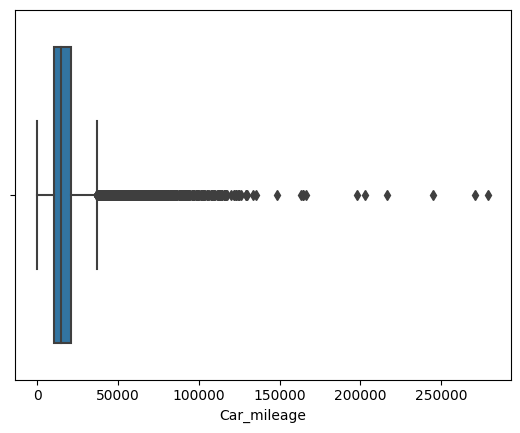

In [27]:
#box plot for price
sns.boxplot(data=vehicle_ad_data, x='price')
plt.show()
#box plot for Car_Age
sns.boxplot(data=vehicle_ad_data, x='Car_Age')
plt.show()
sns.boxplot(data=vehicle_ad_data, x='Car_mileage')
plt.show()

These columns price, Car_Age, and Car_mileage. have a lot of outliers to be removed.Let removed them.

In [28]:
#Remove outliers
def clean_outlier(dataframe, col):
    # Rearrange the column from largest to smallest
    dataframe[col] = dataframe[col].sort_values().values
    
    # Calculate the quantiles
    upper_quantile = dataframe[col].quantile(0.95)
    # Create new column
    new_col = col + '_clean'
    dataframe[new_col] = dataframe[col].copy()
    # Remove outliers
    dataframe.loc[dataframe[new_col] > upper_quantile, col] = None
    return dataframe


In [29]:
clean_outlier(vehicle_ad_data, 'price')
clean_outlier(vehicle_ad_data, 'Car_Age')
clean_outlier(vehicle_ad_data, 'Car_mileage')


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,Car_Age,Car_mileage,price_clean,Car_Age_clean,Car_mileage_clean
0,1.0,2011,bmw x5,2,6,gas,145000,automatic,SUV,black,1,2018-06-23,19,2018,1.0,0.0,1,1,0.0
1,1.0,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2018,1.0,0.0,1,1,0.0
2,1.0,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,1.0,0.0,1,1,0.0
3,1.0,2003,ford f-150,1,8,gas,115980,automatic,pickup,white,0,2019-03-22,9,2019,1.0,0.0,1,1,0.0
4,1.0,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,1.0,0.0,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,NaN,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2018,NaN,NaN,175000,72,NaN
51521,NaN,2002,honda civic,0,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2018,NaN,NaN,189000,83,NaN
51522,NaN,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,2018,NaN,NaN,189000,90,NaN
51523,NaN,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,2018,NaN,NaN,300000,111,NaN


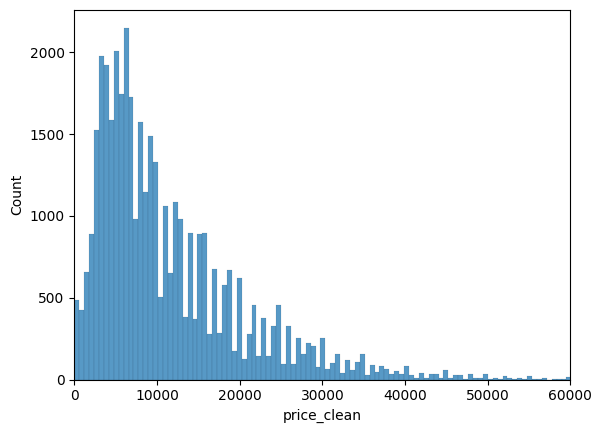

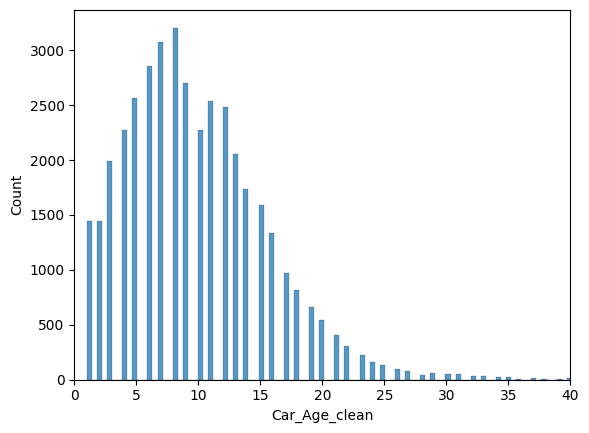

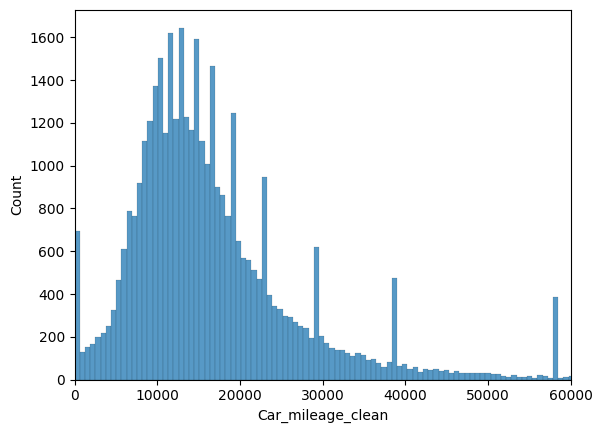

In [33]:
#price plot without outliers
sns.histplot(data=vehicle_ad_data, x='price_clean')
plt.xlim(0, 60000)
plt.show()
# Car_Age without outliers
sns.histplot(data=vehicle_ad_data, x='Car_Age_clean')
plt.xlim(0, 40)
plt.show()
# Car_mileage without outliers
sns.histplot(data=vehicle_ad_data, x='Car_mileage_clean')
plt.xlim(0, 60000)
plt.show()



After removing the outliers, our data distribution appears to be more refined and cleaner.

### Unraveling the Top Car Prices

First, let's examine the type of vehicle that has the highest average price.

Text(0, 0.5, 'Average Price')

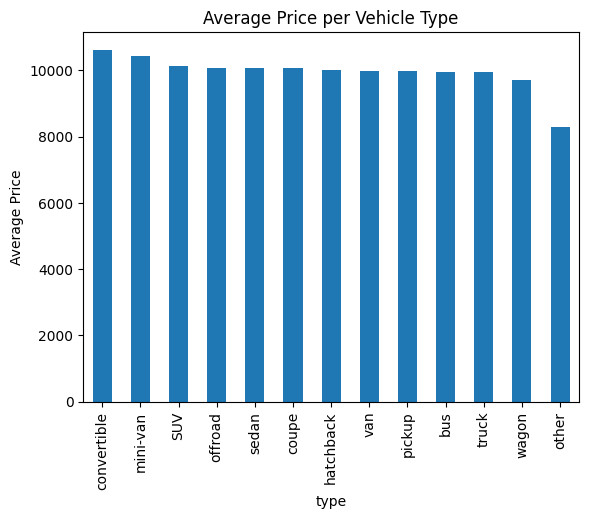

In [53]:

type_grouped = vehicle_ad_data.pivot_table(index='type', values='price', aggfunc='mean')
type_grouped.sort_values(by='price', ascending=False).plot(kind='bar', legend=False)
plt.title('Average Price per Vehicle Type')
plt.ylabel('Average Price')
